# KNN Regression

In [1]:
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

## Load and clean DataFrame 
- Predict log10 of number of followers for each playlist. 
- Standardize columns to be between 0 and 1. 
- Take 80/20 test/train split

In [2]:
df = pd.read_csv('df_by_playlist.csv')
y = np.log10(df['followers'].values)
y[y == -np.inf] = 0
y = y.reshape(len(y),1)

# drop unimportant columns 
drop_cols = [ 'followers','track_feat','track_remast','track_remix','album_feat','album_deluxe','album_best','num_tracks25+',
 'num_tracks50+','num_tracks75+','time_sign_0.0','time_sign_3.0','time_sign_4.0','key_0.0','key_1.0','key_2.0',
 'key_3.0','key_4.0','key_5.0','key_6.0','key_7.0','key_8.0','key_9.0','key_10.0','key_11.0','playlist_name']
X = df.drop(drop_cols,1)

# standardize and split 
X = (X - X.min()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Regression
- Can include kfolds later 

In [3]:
# knn 
knn_train_scores, knn_test_scores = [],[]
ks = np.arange(1,25)

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_train_scores.append(metrics.r2_score(y_train,knn.predict(X_train)))
    knn_test_scores.append(metrics.r2_score(y_test,knn.predict(X_test)))

k_arg = np.argmax(knn_test_scores)
best_k = ks[k_arg]
print('KNN Logistic Regression Training Score k = {}: {}'.
       format(best_k,knn_train_scores[k_arg]))
print('KNN Logistic Regression Testing Score k = {}: {}\n'.
       format(best_k,knn_test_scores[k_arg]))

KNN Logistic Regression Training Score k = 15: 0.23378431131358102
KNN Logistic Regression Testing Score k = 15: 0.16640134301546028



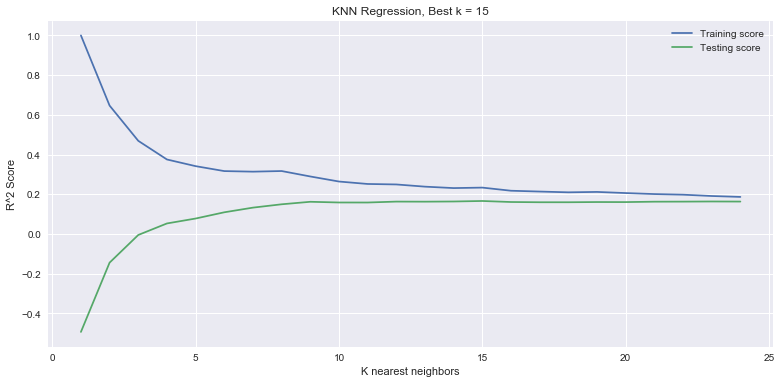

In [4]:
plt.plot(ks,knn_train_scores,label = 'Training score')
plt.plot(ks,knn_test_scores,label = 'Testing score')
plt.xlabel('K nearest neighbors')
plt.ylabel('R^2 Score')
plt.title('KNN Regression, Best k = {}'.format(best_k))
plt.legend()
plt.show()